In [1]:
using DifferentialEquations
using LinearAlgebra
using Plots
using FileIO, JLD2

In [2]:
include("Solvers.jl")
include("PlotFunctions.jl")
include("UsefulFunctions.jl")
include("PointGenerators.jl")

PointsOnSphere (generic function with 2 methods)

In [12]:
θ, μ, β = 10, 28, 8/3
p = [θ, μ, β]
Δt = 0.1
N = 500

500

In [13]:
xint= [-50, 50]
dx = 10
yint = [-50, 50]
dy = 10
zint = [-50, 50]
dz = 10

initial_points = PointsInCuboid(dx, xint, dy, yint, dz, zint);

In [5]:
M = CorrelationMatrix(p,Δt,N,initial_points,[RadauIIA5 RadauIIA5],[10 20]);

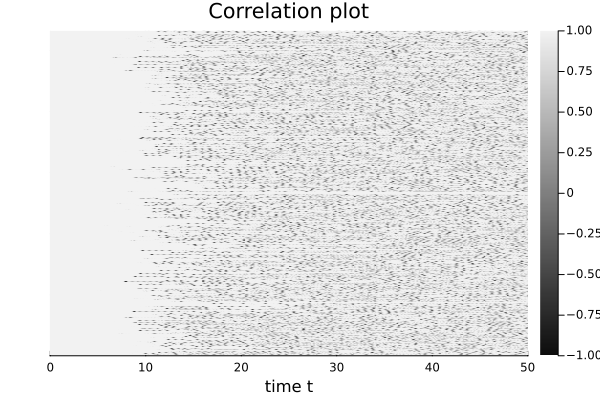

In [6]:
PlotPipPlot(M,Δt,clim=(-1,1))

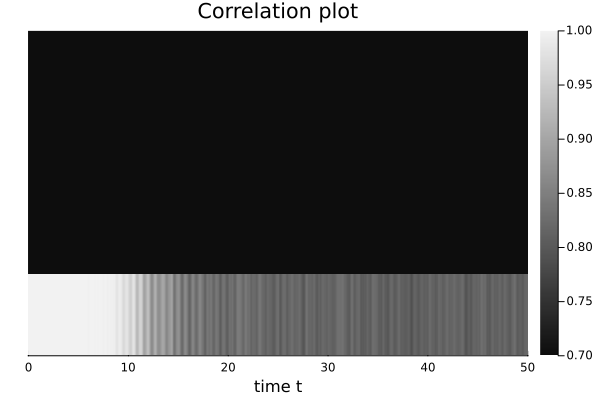

In [7]:
r,c = size(M)
avg = sum(M,dims=1)/r;
Mavg = zeros(4,c)
Mavg[1,:] = avg;
PlotPipPlot(Mavg,Δt,clim=(0.7,1))

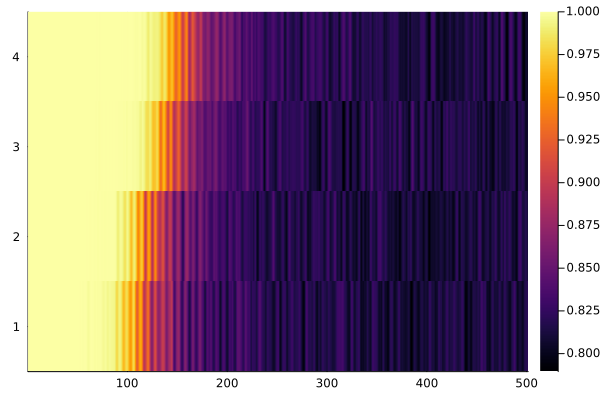

In [11]:
heatmap(Mavg)

In [ ]:
steps = [10 20 30 40 50 60 70 80 90 100]
l = length(initial_points)
Mavg = zeros(10,N+1)
for k = 1:10
    print(k)
    M = CorrelationMatrix(p,Δt,N,initial_points,[RadauIIA5 RadauIIA5],[steps[k] steps[k]*2]);
    Mavg[k,:] = sum(M,dims=1)/l
end

In [43]:
FileIO.save(raw"Saved variables\RadauConvMatrix1.jld2","Mavg",Mavg)


In [44]:
Mavg = FileIO.load(raw"Saved variables\RadauConvMatrix1.jld2","Mavg");

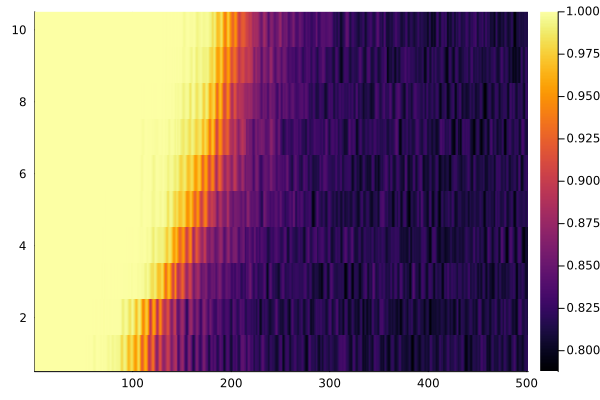

In [46]:
heatmap(Mavg)

In [58]:
steps = 10:11
l = length(initial_points)
Mavg = zeros(length(steps),N+1)
;

In [59]:
for k = 1:length(steps)
    print(k)
    M = CorrelationMatrix(p,Δt,N,initial_points,[RadauIIA5 RadauIIA5],[steps[k] steps[k]*2]);
    Mavg[k,:] = sum(M,dims=1)/l
end

12

In [ ]:
FileIO.save(raw"Saved variables\RadauConvMatrix2.jld2","Mavg",Mavg)